<a href="https://colab.research.google.com/github/knoppin1/DATA-606/blob/main/county_vaccinations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [ ]:
wd = os.getcwd()
wd

'C:\\Users\\Ken\\Documents\\Ken\\College\\UMBC\\Data_Science\\DATA_606_Capstone_in_Data_Science\\Project'

In [ ]:
os.listdir(wd)

['.ipynb_checkpoints',
 'co-est2019-alldata.csv',
 'county_income.ipynb',
 'county_population.ipynb',
 'county_vaccinations.ipynb',
 'covid-19.jpg',
 'COVID-19.png',
 'COVID-19_Vaccinations_in_the_United_States_County.csv',
 'iframe_figures',
 'incomes.pkl',
 'lapi1120.xlsx',
 'merged_income_vax.pkl',
 'merge_income_vax.ipynb',
 'Untitled.ipynb',
 'vaccinations.pkl',
 '~$lapi1120.xlsx']

Load Census Population Data

In [ ]:
vaccine_file = wd + '\\' + 'COVID-19_Vaccinations_in_the_United_States_County.csv'
vaccine_file

'C:\\Users\\Ken\\Documents\\Ken\\College\\UMBC\\Data_Science\\DATA_606_Capstone_in_Data_Science\\Project\\COVID-19_Vaccinations_in_the_United_States_County.csv'

In [ ]:
df = pd.read_csv(vaccine_file, sep = '\t', encoding='UTF-16 LE', low_memory=False)
df.shape

(593800, 14)

In [ ]:
df.head(5).T

,0,1,2,3,4
Date,6/11/2021,6/11/2021,6/11/2021,6/11/2021,6/11/2021
FIPS,13265,28083,37103,48491,27099
MMWR_week,23,23,23,23,23
Recip_County,Taliaferro County,Leflore County,Jones County,Williamson County,Mower County
Recip_State,GA,MS,NC,TX,MN
Series_Complete_Pop_Pct,8.5,32.3,32.5,0,44.4
Series_Complete_Yes,130,"9,114","3,058",0,"17,800"
Series_Complete_12Plus,130,"9,114","3,057",0,"17,791"
Series_Complete_12PlusPop_Pct,9.6,39.6,36.8,0,53.2
Series_Complete_18Plus,129,"9,038","3,043",0,"17,397"


In [ ]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df.shape

(593800, 14)

In [ ]:
# Get number of days with data in data set
len(df.Date.unique())

181

In [ ]:
df = df.filter(['Date','FIPS','Recip_County','Recip_State',
                'Series_Complete_Pop_Pct','Series_Complete_Yes'], axis=1)
df.columns

Index(['Date', 'FIPS', 'Recip_County', 'Recip_State',
       'Series_Complete_Pop_Pct', 'Series_Complete_Yes'],
      dtype='object')

In [ ]:
df.rename(columns={'Recip_State':'State', 'Recip_County':'County',               
                   'Series_Complete_Yes':'Vaccinated',
                   'Series_Complete_Pop_Pct':'Vaccinated Pct'}, inplace=True)
df = df[['Date','FIPS','State','County','Vaccinated','Vaccinated Pct']]
df.head(10)

,Date,FIPS,State,County,Vaccinated,Vaccinated Pct
0,6/11/2021,13265,GA,Taliaferro County,130,8.5
1,6/11/2021,28083,MS,Leflore County,"9,114",32.3
2,6/11/2021,37103,NC,Jones County,"3,058",32.5
3,6/11/2021,48491,TX,Williamson County,0,0.0
4,6/11/2021,27099,MN,Mower County,"17,800",44.4
5,6/11/2021,UNK,MO,Unknown County,"212,021",0.0
6,6/11/2021,46127,SD,Union County,"5,917",37.1
7,6/11/2021,48235,TX,Irion County,0,0.0
8,6/11/2021,29161,MO,Phelps County,"12,872",28.9
9,6/11/2021,48453,TX,Travis County,0,0.0


In [ ]:
df.dtypes

Date               object
FIPS               object
State              object
County             object
Vaccinated         object
Vaccinated Pct    float64
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.head(5)

,Date,FIPS,State,County,Vaccinated,Vaccinated Pct
0,2021-06-11,13265,GA,Taliaferro County,130,8.5
1,2021-06-11,28083,MS,Leflore County,"9,114",32.3
2,2021-06-11,37103,NC,Jones County,"3,058",32.5
3,2021-06-11,48491,TX,Williamson County,0,0.0
4,2021-06-11,27099,MN,Mower County,"17,800",44.4


In [ ]:
df[df['County'] == 'Taliaferro County'].head(5)

,Date,FIPS,State,County,Vaccinated,Vaccinated Pct
0,2021-06-11,13265,GA,Taliaferro County,130,8.5
4311,2021-06-10,13265,GA,Taliaferro County,130,8.5
7944,2021-06-09,13265,GA,Taliaferro County,130,8.5
11962,2021-06-08,13265,GA,Taliaferro County,130,8.5
14038,2021-06-07,13265,GA,Taliaferro County,128,8.3


In [ ]:
most_recent_date = df['Date'].max()
most_recent_date

Timestamp('2021-06-11 00:00:00')

In [ ]:
# Filter rows by most recent date
from datetime import datetime

filter = 'Date == ' + '"' + most_recent_date.strftime("%Y-%m-%d") + '"'
filter

'Date == "2021-06-11"'

In [ ]:
df = df.query(filter)
df.shape

(3282, 6)

In [ ]:
df.describe(include="all")

,Date,FIPS,State,County,Vaccinated,Vaccinated Pct
count,3282,3282,3282,3282,3282,3282.00000
unique,1,3225,60,1960,2835,NaN
top,2021-06-11 00:00:00,UNK,TX,Unknown County,0,NaN
freq,3282,58,254,58,276,NaN
first,2021-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2021-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,28.71106
std,NaN,NaN,NaN,NaN,NaN,14.77096
min,NaN,NaN,NaN,NaN,NaN,0.00000
25%,NaN,NaN,NaN,NaN,NaN,22.10000


Address rows with "UNK" FIPS code

In [ ]:
unknowns_df = df[df['FIPS'] == 'UNK']
unknowns_df.shape

(58, 6)

In [ ]:
unknowns_df.head(5)

,Date,FIPS,State,County,Vaccinated,Vaccinated Pct
5,2021-06-11,UNK,MO,Unknown County,"212,021",0.0
13,2021-06-11,UNK,ME,Unknown County,"30,013",0.0
49,2021-06-11,UNK,PA,Unknown County,"393,258",0.0
65,2021-06-11,UNK,AR,Unknown County,"108,559",0.0
298,2021-06-11,UNK,SC,Unknown County,"122,039",0.0


The vaccinations associated with these rows cannot be attributed to a county, so remove them.

In [ ]:
filter = 'FIPS != ' + '"UNK"'
df = df.query(filter)
df.shape

(3224, 6)

In [ ]:
df['FIPS'] = pd.to_numeric(df['FIPS'])
df.Vaccinated = df.Vaccinated.str.replace(',', '')
df['Vaccinated'] = pd.to_numeric(df['Vaccinated'])
df.dtypes

Date              datetime64[ns]
FIPS                       int64
State                     object
County                    object
Vaccinated                 int64
Vaccinated Pct           float64
dtype: object

In [ ]:
df.head(5)

,Date,FIPS,State,County,Vaccinated,Vaccinated Pct
0,2021-06-11,13265,GA,Taliaferro County,130,8.5
1,2021-06-11,28083,MS,Leflore County,9114,32.3
2,2021-06-11,37103,NC,Jones County,3058,32.5
3,2021-06-11,48491,TX,Williamson County,0,0.0
4,2021-06-11,27099,MN,Mower County,17800,44.4


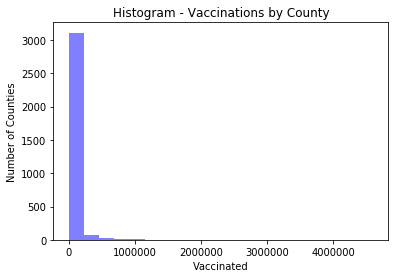

In [ ]:
import matplotlib.pyplot as plt

num_bins = 20
n, bins, patches = plt.hist(df['Vaccinated'], num_bins, facecolor='blue', alpha=0.5) 

plt.xlabel('Vaccinated')
plt.ylabel('Number of Counties')
plt.title(r'Histogram - Vaccinations by County')
plt.show()

In [ ]:
# https://onestopdataanalysis.com/python-outlier-detection/
 
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers

In [ ]:
 # input data
outliers = detect_outlier((df["Vaccinated"]))
len(outliers)

460

In [ ]:
min(outliers)

46951

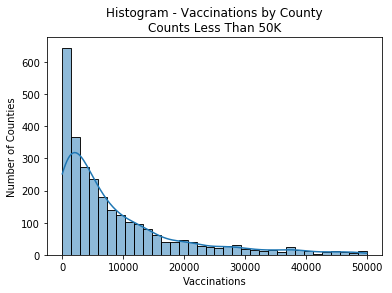

In [ ]:
vaccinated = sorted(df['Vaccinated'])

out_threshold = 50000
vaccinated = [i for i in vaccinated if i < out_threshold]

g = sns.histplot(data=vaccinated, kde=True)
g.set_title("Histogram - Vaccinations by County\nCounts Less Than 50K")
g.set_xlabel("Vaccinations")
g.set_ylabel("Number of Counties")
plt.show()

In [ ]:
sorted(outliers, reverse=True)[:10]

[4606491,
 2234799,
 1541195,
 1518080,
 1321879,
 1287791,
 1218631,
 1172599,
 1132817,
 1018259]

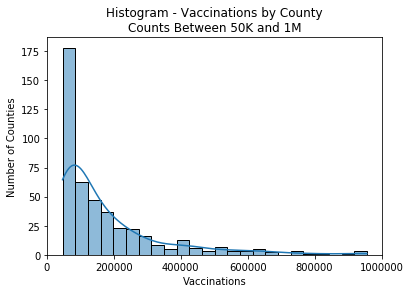

In [ ]:
vaccinated = sorted(outliers)

out_threshold = 1000000
vaccinated = [i for i in vaccinated if i < out_threshold]

g = sns.histplot(data=vaccinated, kde=True)
g.set_title("Histogram - Vaccinations by County\nCounts Between 50K and 1M")
g.set_xlabel("Vaccinations")
g.set_ylabel("Number of Counties")
plt.show()

Show a scatter plot of the vaccinations by County

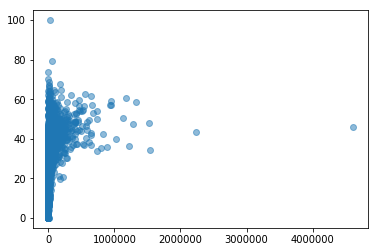

In [ ]:
plt.scatter(df['Vaccinated'], df['Vaccinated Pct'], alpha=0.5)
plt.show()

In [ ]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe_connected'

In [ ]:
fig = px.scatter(df,x='Vaccinated', y='Vaccinated Pct',hover_data=['State','County'])
fig.update_layout(title="County Vaccination Counts and Percentages", title_x=0.5)
fig.show()

In [ ]:
import pickle
df.to_pickle("./vaccinations.pkl")